# **Flight Price Predictor**

## **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Load the dataset**

In [ ]:
df=pd.read_csv('Flight_prices.csv')

## **Inspect the data**

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.shape

(300153, 12)

## **Data Cleaning**

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


## **Data Exploration**

In [ ]:
df.head(3)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('airline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('flight').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('departure_time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('arrival_time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Unnamed: 0', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='duration', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('airline')):
  _plot_series(series, series_name, i)
  fig.legend(title='airline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('flight')):
  _plot_series(series, series_name, i)
  fig.legend(title='flight', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('departure_time')):
  _plot_series(series, series_name, i)
  fig.legend(title='departure_time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('arrival_time')):
  _plot_series(series, series_name, i)
  fig.legend(title='arrival_time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
_df_13['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['flight'].value_counts()
    for x_label, grp in _df_16.groupby('airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('airline')
_ = plt.ylabel('flight')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['departure_time'].value_counts()
    for x_label, grp in _df_17.groupby('flight')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('flight')
_ = plt.ylabel('departure_time')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['arrival_time'].value_counts()
    for x_label, grp in _df_18.groupby('departure_time')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('departure_time')
_ = plt.ylabel('arrival_time')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['airline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Unnamed: 0', y='airline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['flight'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Unnamed: 0', y='flight', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['departure_time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Unnamed: 0', y='departure_time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['arrival_time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Unnamed: 0', y='arrival_time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [ ]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [ ]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [ ]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [ ]:
df['duration'].min()

0.83

In [ ]:
df['duration'].max()

49.83

In [ ]:
df['duration'].median()

11.25

<Axes: xlabel='airline', ylabel='price'>

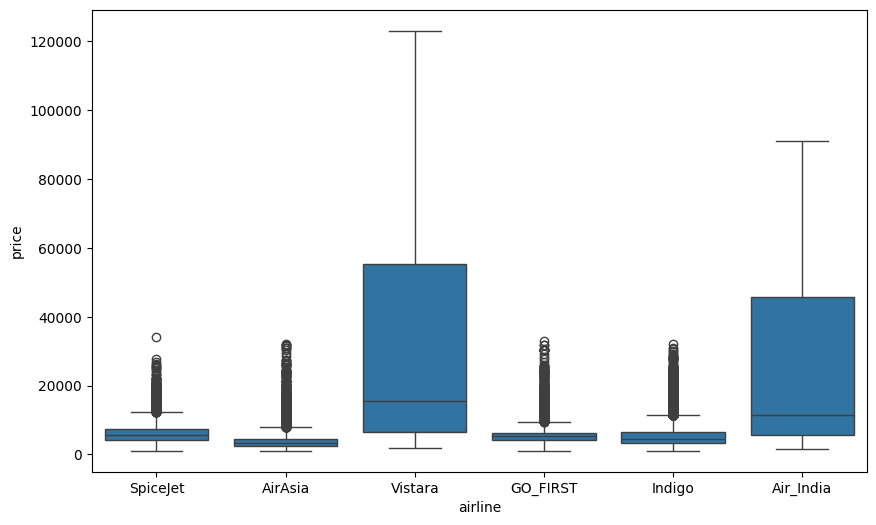

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='airline',y='price',data=df)
#Vistara and Air India have highest prices. Their median prices are also higher than others.
#The others have many outliers suggesting variability .

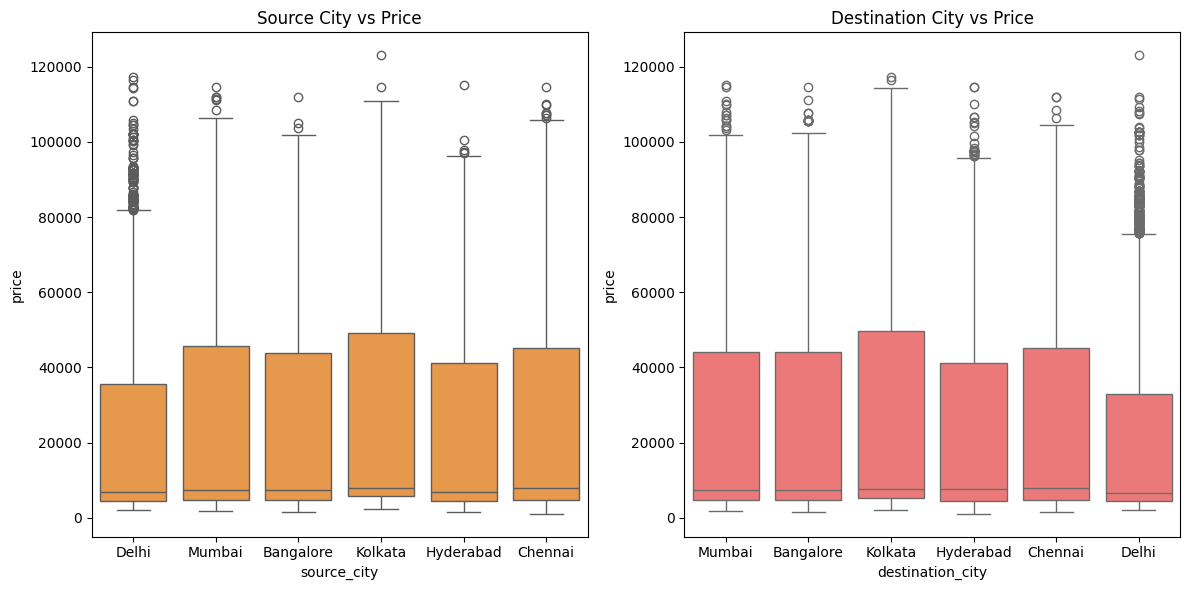

In [ ]:
#BOXPLOT: Source City and Destination City VS Price
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df, color='#FF9933')
plt.title('Source City vs Price')

plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,color='#FF6666')
plt.title('Destination City vs Price')


plt.tight_layout()
plt.show()
#Kolkata stands out with thw widest range of prices followed by Chennai.
#Delhi as source and destination shows highest price outliers
#All cities have low median suggesting most prices are below the average value along with high priced outliers present.

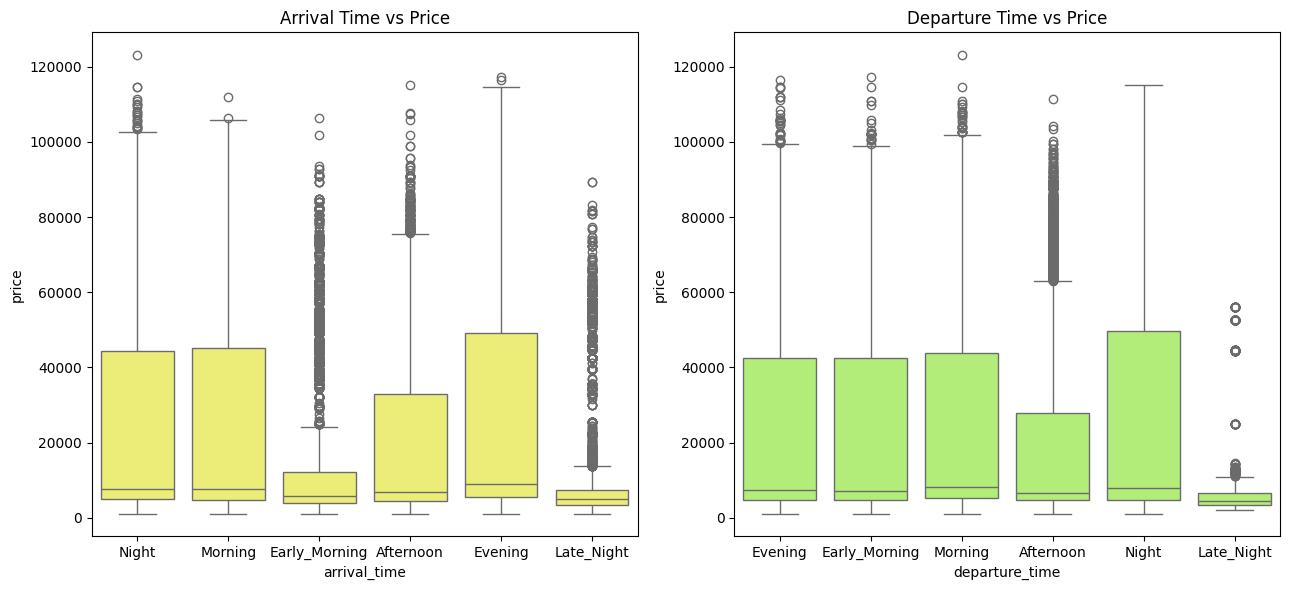

In [ ]:
#BOXPLOT: Arrival and Departure Time VS ticket Price
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
sns.boxplot(x='arrival_time',y='price',data=df, color='#FFFF66')
plt.title('Arrival Time vs Price')

plt.subplot(1,2,2)
sns.boxplot(x='departure_time',y='price',data=df,color='#B2FF66')
plt.title('Departure Time vs Price')

plt.tight_layout()
plt.show()

#Most of the data is below 50,000
#Figure 1: Early_Morning and Late_Night arrival times show the smallest price ranges.
# Early_Morning has dense outliers.
#Early_Morning,Afternoon and Late_Night have high outliers indicating unsually high price compared to the typical price range.

#Figure 2:Late_Night departure has smallest range
# Afternoon has dense outliers indicating unsually high price compared to the typical price range.


<Axes: xlabel='stops', ylabel='price'>

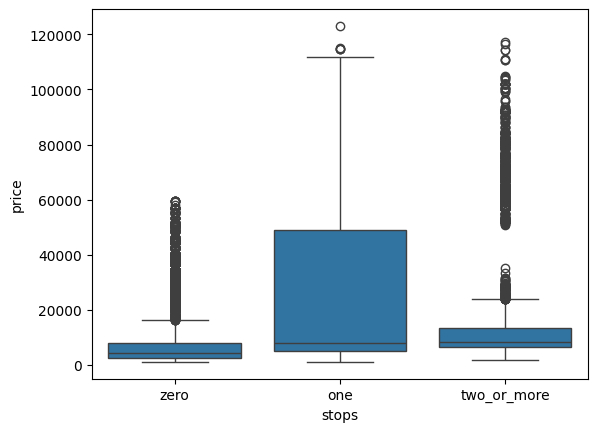

In [ ]:
sns.boxplot(x='stops',y='price',data=df)
#All categories have some extreme outliers, but the number of outliers increases with the number of stops.

<Axes: >

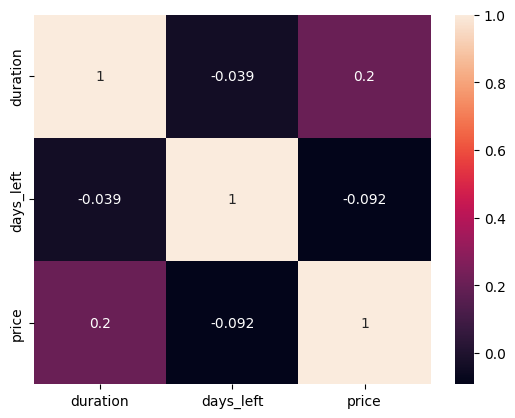

In [ ]:
#HEATMAP: All numeric columns with Target(price)
numeric_col=['duration','days_left','price']
numeric_df=df[numeric_col]

sns.heatmap(numeric_df.corr(),annot=True)
# Weak correlation(0.2) of flight duration and price.
#Longer flights tend to have slightly higher prices, but no strong relationship.

#A very weak negative relationship exists between price and days_left.
#As days left before departure decreases, prices may slightly increase but the relationship is not strong.

## **Data Pre-processing**

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.drop(columns=['flight'],inplace=True)

## **Hot Encoding and mapping**

In [ ]:
df['stops']=df['stops'].map({'zero':0,'two_or_more':2,'one':1})

In [ ]:
df['class']=df['class'].map({'Economy':0,'Business':1})

In [ ]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956


In [ ]:
df=df.join(pd.get_dummies(df['airline'], prefix='airline', dtype=int)).drop('airline',axis=1)
df=df.join(pd.get_dummies(df['source_city'],prefix='source', dtype=int)).drop('source_city',axis=1)
df=df.join(pd.get_dummies(df['departure_time'],prefix='departure', dtype=int)).drop('departure_time',axis=1)
df=df.join(pd.get_dummies(df['arrival_time'],prefix='arrival', dtype=int)).drop('arrival_time',axis=1)
df=df.join(pd.get_dummies(df['destination_city'], prefix='dest', dtype=int)).drop('destination_city',axis=1)

In [ ]:
df.head(3)

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,dest_Bangalore,dest_Chennai,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_Bangalore',
       'source_Chennai', 'source_Delhi', 'source_Hyderabad', 'source_Kolkata',
       'source_Mumbai', 'departure_Afternoon', 'departure_Early_Morning',
       'departure_Evening', 'departure_Late_Night', 'departure_Morning',
       'departure_Night', 'arrival_Afternoon', 'arrival_Early_Morning',
       'arrival_Evening', 'arrival_Late_Night', 'arrival_Morning',
       'arrival_Night', 'dest_Bangalore', 'dest_Chennai', 'dest_Delhi',
       'dest_Hyderabad', 'dest_Kolkata', 'dest_Mumbai'],
      dtype='object')

# **EDA**

<Axes: xlabel='price', ylabel='Count'>

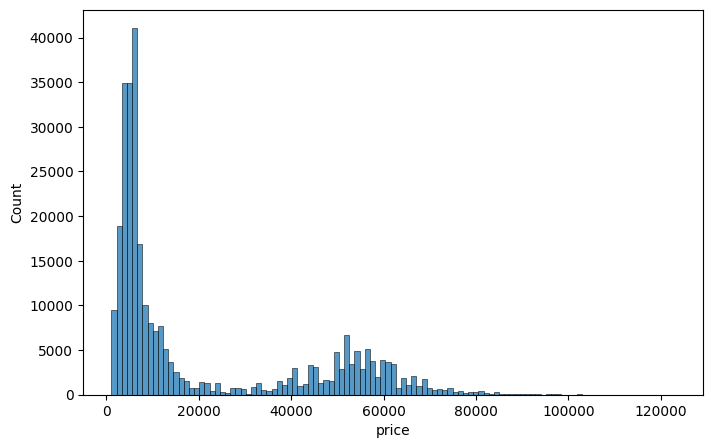

In [ ]:
#price distribution
plt.figure(figsize=(8,5))
sns.histplot(df.price)
#Right skewed distribution with highest price between 0 and 20000.There is another peak between 40k and 60k.

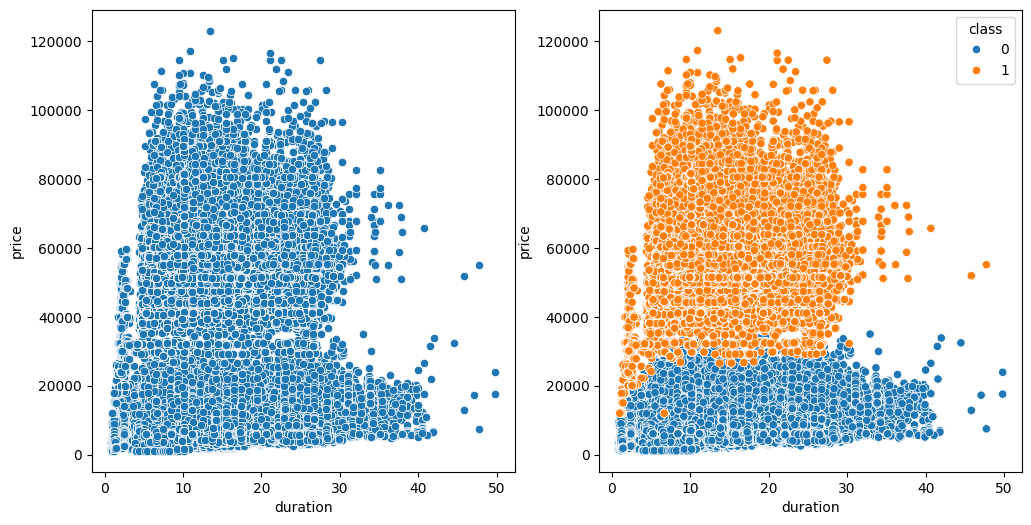

In [ ]:
#numerical values VS target value
#Numerical values: duration, days_left

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) #1 row, 2 cols, 1st plot
sns.scatterplot(x='duration',y='price',data=df)#No linear relationship

plt.subplot(1, 2, 2)
sns.scatterplot(x='duration',y='price', hue='class',data=df)#'Business class' has more expensive tickets than 'Economy'

plt.show()


<Axes: xlabel='days_left', ylabel='price'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


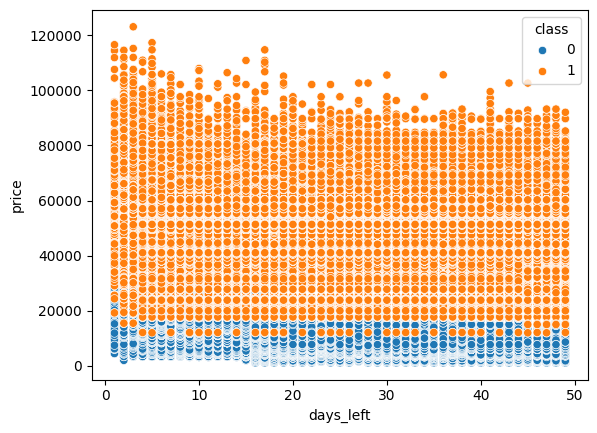

In [ ]:
sns.scatterplot(x='days_left',y='price',hue='class',data=df)
#Price is higher as the days left are lesser

# **Import model**

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# **Train test split**

In [67]:
X=df.drop(columns=['price'])
y=df.price

In [68]:
X_test,X_train, y_test, y_train= train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [70]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=reg.predict(X_test)

In [72]:
y_pred1=xgb.predict(X_test)

In [74]:
reg.score(X_test,y_test) #By default calculates the r2 score

0.9820036216582817

In [73]:
xgb.score(X_test,y_test)

0.9753965139389038

# **Evaluating model**

In [ ]:
#R2 : measures how well your regression model explains the variability in the target.
#MAE : average magnitude of errors between predicted and actual values. Model if off by Rs.1389
#MSE: Squares errors between predicted and actual values but gives more weightage to larger errors

In [ ]:
print('R2 for RandomForestRegressor:', r2_score(y_test,y_pred))
print('MAE for RandomForestRegressor:', mean_absolute_error(y_test,y_pred))
print('MSE for RandomForestRegressor:', mean_squared_error(y_test,y_pred))

R2: 0.981977909274492
MAE: 1389.9025486105409
MSE: 9283414.730200538


In [75]:
print('R2 for XGBRegressor:', r2_score(y_test,y_pred1))
print('MAE for XGBRegressor:', mean_absolute_error(y_test,y_pred1))
print('MSE for XGBRegressor:', mean_squared_error(y_test,y_pred1))

R2 for XGBRegressor: 0.9753965139389038
MAE for XGBRegressor: 2053.244730448159
MSE for XGBRegressor: 12673578.156796053


In [ ]:
#In this case, RandomForestRegressor has outperformed XGBRegressor.

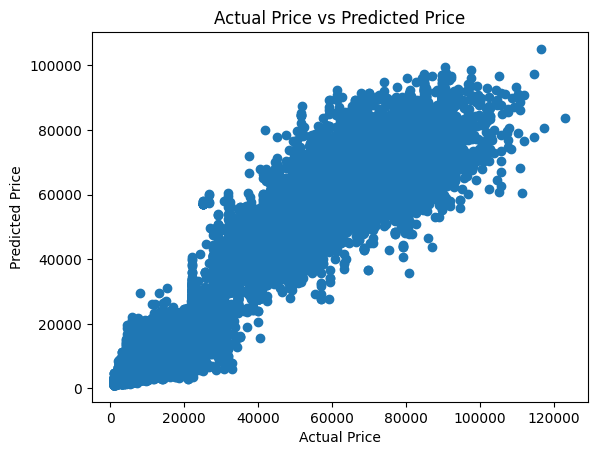

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [ ]:
df.price.describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


# **Features and their importance**

In [ ]:
importance=reg.feature_importances_    #Feature importance values
feature_name=reg.feature_names_in_     #Feature names

In [ ]:
feature_importance_df=pd.DataFrame({
    'importance':reg.feature_importances_,
    'feature':reg.feature_names_in_
})

In [ ]:
feature_importance_df.head().sort_values(by='importance',ascending=False) #Top 5 important features

,importance,feature
1,0.880302,class
2,0.055592,duration
3,0.019306,days_left
0,0.001670,stops
4,0.000491,airline_AirAsia


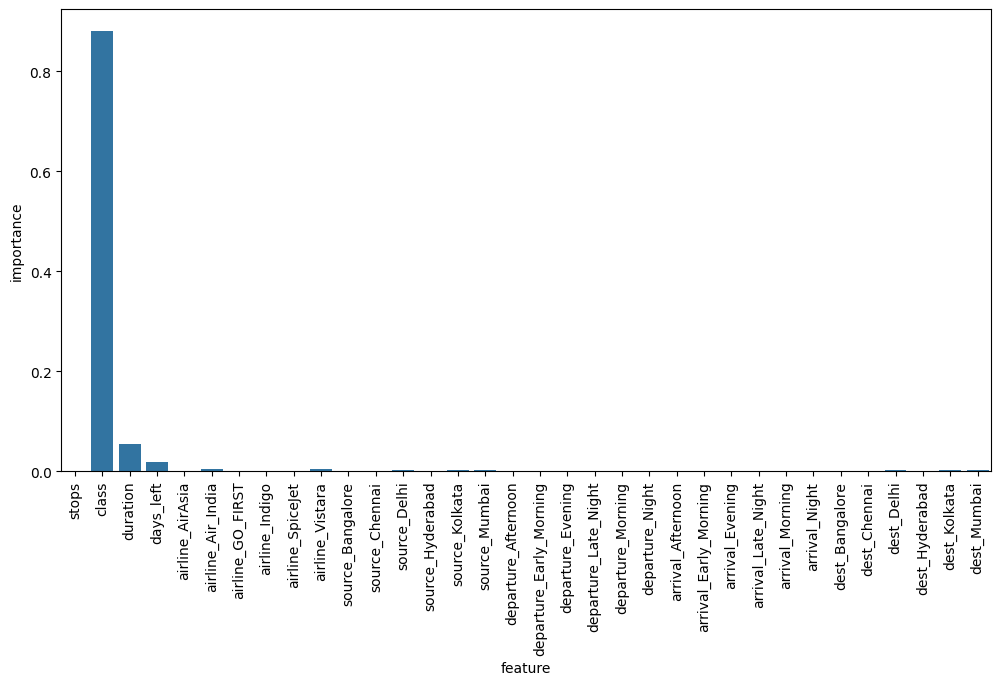

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='feature',y='importance', data=feature_importance_df)
plt.xticks(rotation=90)
plt.show()
#Class is evidently the most important feature

<ipython-input-64-0d32b3f2fc72>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature',y='importance',data=top_5_importances, palette='plasma')


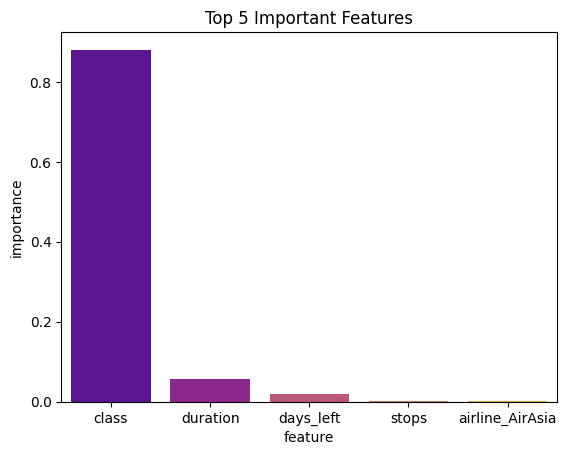

In [ ]:
top_5_importances=feature_importance_df.head().sort_values(by='importance',ascending=False) #Top 5 important features

sns.barplot(x='feature',y='importance',data=top_5_importances, palette='plasma')
plt.title('Top 5 Important Features')

plt.show()

In [77]:
from joblib import dump

In [78]:
dump(reg,'flight_price_model.joblib')
print("RandomForestRegressor model saved successfully!")

RandomForestRegressor model saved successfully!


# Summary:

Model Performance:

* RandomForestRegressor: R² =0.981, MAE = ₹1389.90,MSE= 9,283,414.73
* XGBRegressor: R² = 0.97, MAE = ₹2053.20, MSE = 12,673,578.15.
* Top 5 Features:
Class, Duration, Days Left, Stops, Airline_AirAsia.

Columns:

* Numerical: Price, Duration, Days Left.
* Categorical: Airline, Source City, Destination City, Class, Stops, Departure Time, Arrival Time.

Data Preprocessing:

* Mapped categorical features (Class, Stops).
* Applied one-hot encoding to Airline, Source City, Destination City, Departure Time, and Arrival Time.